In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [3]:
from dataset_noise_generator import *

In [4]:
from sklearn.datasets import make_regression

___

How to use the noise generator: 

In [5]:
num_indep = 2

n_sample = 100

# X_base = np.ones((n_sample,num_indep))
np.random.seed(1)
X_base = np.random.rand(n_sample,num_indep)*100

In [6]:
X_base, y, coeffs = make_regression(n_samples=n_sample, n_features=num_indep, n_informative=num_indep,
                       tail_strength=0, bias=0, n_targets=1, noise=0, 
                           shuffle=False, coef=True, random_state=2)
X = X_base + gen_noise(X_base, 3, 'linear_inc')*gen_noise(X_base, 0.5, 'normal')

In [7]:
coeffs

array([38.07925837, 17.83098278])

In [8]:
X_base, y, coeffs = make_regression_custom(n_samples=n_sample, n_features=num_indep, n_informative=num_indep,
                       tail_strength=0, bias=0, n_targets=1, noise=0, 
                           shuffle=False, coef=True, random_state=2, custom_coef=[30,15])
X = X_base + gen_noise(X_base, 3, 'linear_inc')*gen_noise(X_base, 0.5, 'normal')

In [9]:
coeffs

array([30., 15.])

(array([[ 2.,  2.,  3.,  5.,  8., 10., 15., 10., 11., 13.,  7.,  6.,  2.,
          3.,  0.,  1.,  0.,  1.,  0.,  1.],
        [ 1.,  4.,  2.,  3.,  6.,  6., 13., 14.,  9., 15., 12.,  7.,  4.,
          1.,  2.,  1.,  0.,  0.,  0.,  0.]]),
 array([-2.65944946, -2.32104235, -1.98263525, -1.64422814, -1.30582104,
        -0.96741394, -0.62900683, -0.29059973,  0.04780738,  0.38621448,
         0.72462158,  1.06302869,  1.40143579,  1.7398429 ,  2.07825   ,
         2.4166571 ,  2.75506421,  3.09347131,  3.43187842,  3.77028552,
         4.10869262]),
 <a list of 2 BarContainer objects>)

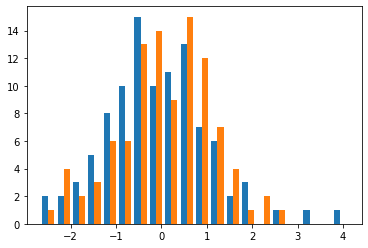

In [26]:
plt.hist(X_base, bins=20)

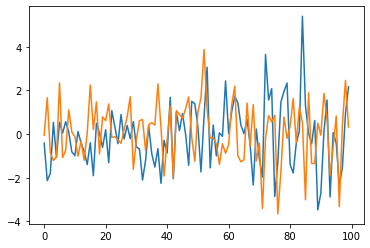

In [12]:
plt.plot(X)

___

Options for noise: 

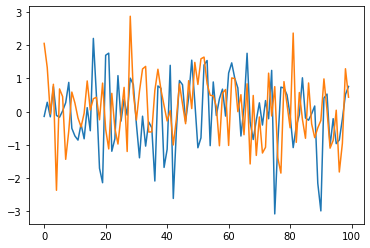

In [13]:
plt.plot(gen_noise(X_base, 1, 'normal'))

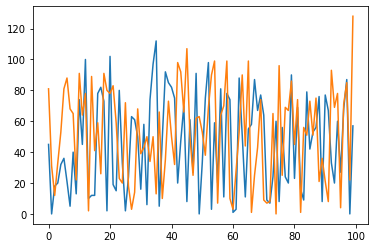

In [76]:
plt.plot(gen_noise(X_base, 1, 'poisson'))

20


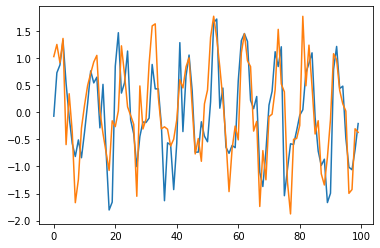

In [12]:
plt.plot(gen_noise(X_base, 1, 'sin', n_osc=10)+gen_noise(X_base, 0.5, 'normal'))

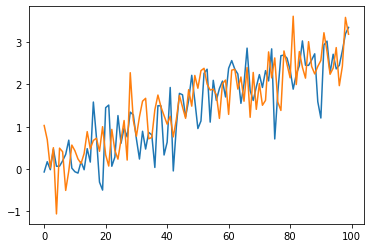

In [8]:
plt.plot(gen_noise(X_base, 3, 'linear_inc')+gen_noise(X_base, 0.5, 'normal'))

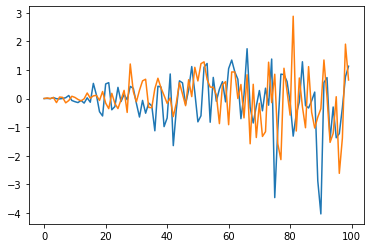

In [7]:
plt.plot(gen_noise(X_base, 3, 'linear_inc')*gen_noise(X_base, 0.5, 'normal'))

(array([ 9., 25., 66.]),
 array([1, 2, 3, 4]),
 <BarContainer object of 3 artists>)

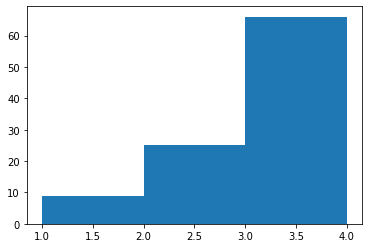

In [53]:
plt.hist(gen_noise(X_base, 1, 'population_weights', population=[1,2,3], weights=[0.1,0.2,0.7]),bins=[1,2,3,4])

In [49]:
gen_noise(_,_,noise_type='lambda', func=np.random.normal, func_args={'loc':0, 'scale':1, 'size':10})

array([-0.14235884,  2.05722174,  0.28326194,  1.32981198, -0.15462185,
       -0.06903086,  0.75518049,  0.82564665, -0.11306921, -2.36783759])

___

In [77]:
num_indep = 2

n_sample = 100

np.random.seed(42)
coeff_factor = 40
coeffs = np.random.rand(num_indep)*coeff_factor
# coeffs = [2,10]

np.random.seed(0)
noise_factor = 10
noise_coeffs = np.random.rand(num_indep)*noise_factor



In [107]:
# X_base = np.ones((n_sample,num_indep))
np.random.seed(1)
X_base = np.random.rand(n_sample,num_indep)*10

np.random.seed(2)
# noise = gen_noise(X_base, noise_coeffs, 'poisson')
noise = gen_noise(X_base, 3, 'linear_inc')*gen_noise(X_base, 3, 'normal')

X = X_base + noise

In [108]:
y = theoretical_function_linear(X, coeffs, 100)

mean abs Y:  314.267396859632
mean abs noise:  77.86855758461178
mean SNR:  11.424400055214836


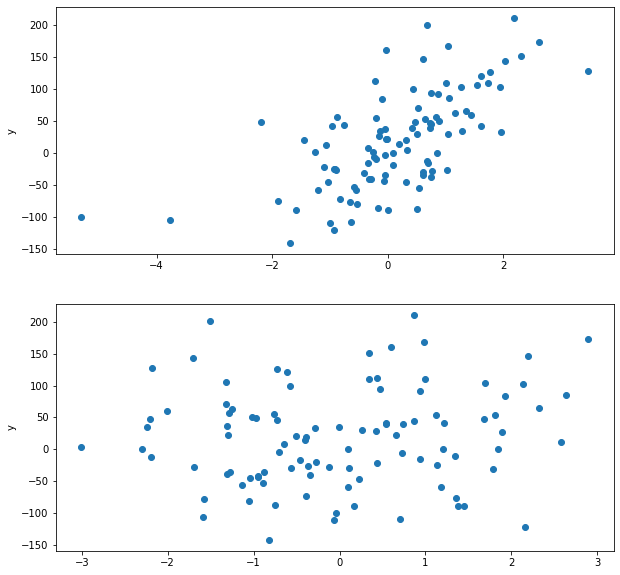

In [148]:
if X.shape[1] == 1: 
    nr = X.shape[1]+1
else: 
    nr = X.shape[1]

f, ax = plt.subplots(nrows=nr, ncols=1, figsize=(10,10))
for i in range(X.shape[1]): 
    ax[i].scatter(X[:,i],y)
    ax[i].set_ylabel('y')

___

In [19]:
coeffs

array([30., 15.])

In [21]:
from sklearn import datasets, linear_model
import statsmodels.api as sm

X_tofit = X

thershold = int(len(X)*0.8)
X_train, X_test = X_tofit[:thershold], X_tofit[thershold:]
y_train, y_test = y[:thershold], y[thershold:]

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
fitted = model.predict(X_train)

X2 = sm.add_constant(X_tofit)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     82.58
Date:                Sat, 16 Oct 2021   Prob (F-statistic):           1.14e-21
Time:                        00:25:29   Log-Likelihood:                -451.38
No. Observations:                 100   AIC:                             908.8
Df Residuals:                      97   BIC:                             916.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2761      2.253      0.566      0.5

In [22]:
model.coef_

array([21.17360988,  6.93412462])

In [23]:
residuals = fitted - y_train
print("Expected error estimate: {}".format(sum(residuals)/len(residuals)))

Expected error estimate: 1.6431300764452318e-15


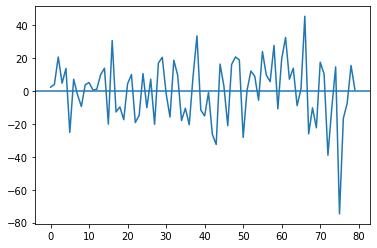

In [24]:
plt.plot(residuals)
plt.gca().axhline([0])

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  5., 10., 10.,  2., 10.,
        11., 11., 11.,  1.,  3.,  1.,  1.]),
 array([-74.71018778, -68.70784905, -62.70551032, -56.70317159,
        -50.70083286, -44.69849413, -38.6961554 , -32.69381666,
        -26.69147793, -20.6891392 , -14.68680047,  -8.68446174,
         -2.68212301,   3.32021572,   9.32255445,  15.32489318,
         21.32723191,  27.32957064,  33.33190937,  39.3342481 ,
         45.33658683]),
 <BarContainer object of 20 artists>)

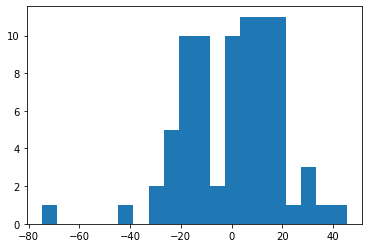

In [25]:
plt.hist(residuals, bins=20)

___

In [19]:
import pandas as pd

In [23]:
def data_to_df(X, y):
    df = pd.DataFrame(X, columns=['x'+str(i) for i in range(X.shape[1])])
    df['y'] = y
    return df

In [24]:
df = data_to_df(X,y)